In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\artoe\Documents\DataAnalytics\Data Immersion\Exercises\Achievement 4\Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_flagged.pkl'))

<Axes: xlabel='orders_day_of_week'>

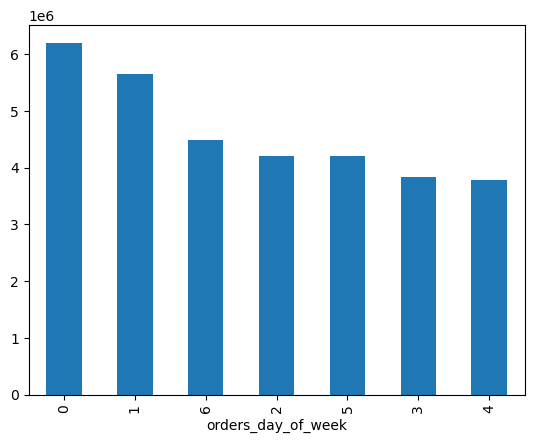

In [4]:
#create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

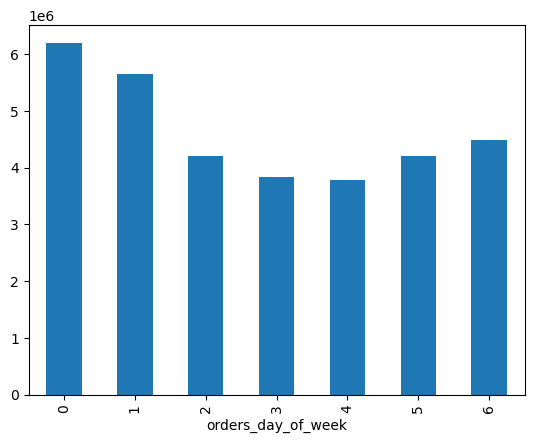

In [5]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

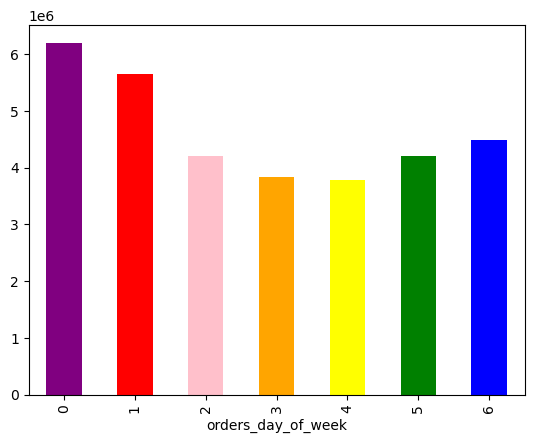

In [6]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
#save visualization as image file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

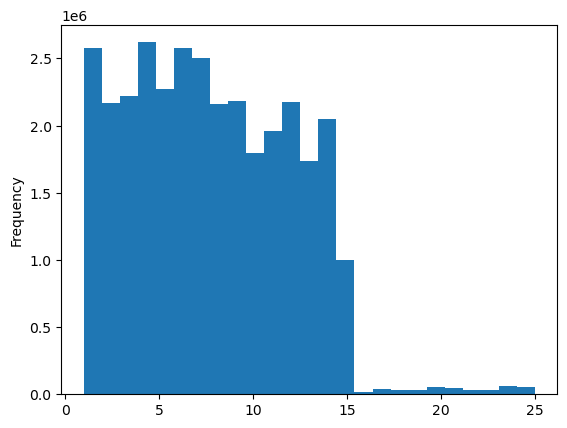

In [8]:
#create a histogram from prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [9]:
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

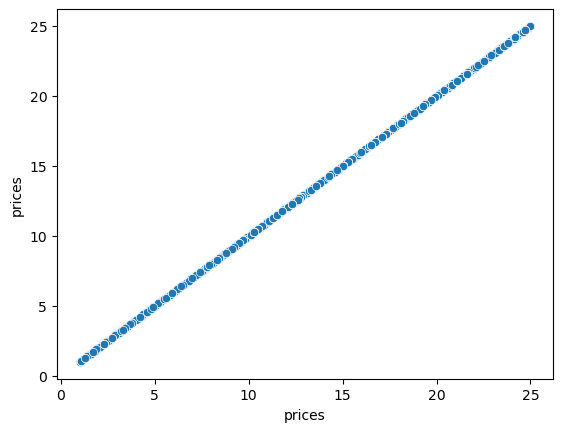

In [10]:
#create a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [11]:
#check for more outliers in ords_prods_merge
ords_prods_merge[['product_id', 'prices']].loc[ords_prods_merge['prices'] > 100]

,product_id,prices


In [12]:
#there are two outlying values - 14900 and 99999
ords_prods_merge['prices'].max()

25.0

In [13]:
#convert these outliers to NaN values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
#check new max value
ords_prods_merge['prices'].max()

25.0

In [15]:
#following code will use cleaned, updated data without outliers

<Axes: ylabel='Frequency'>

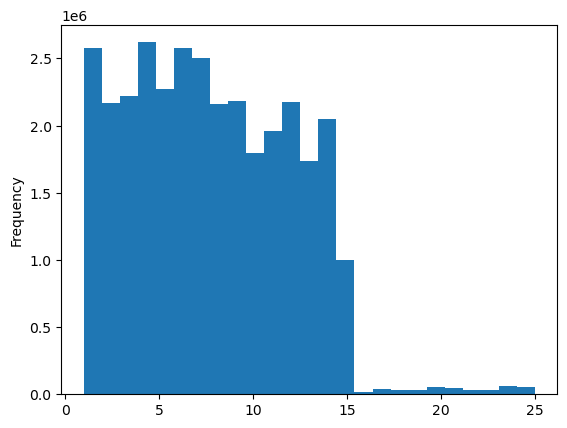

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)

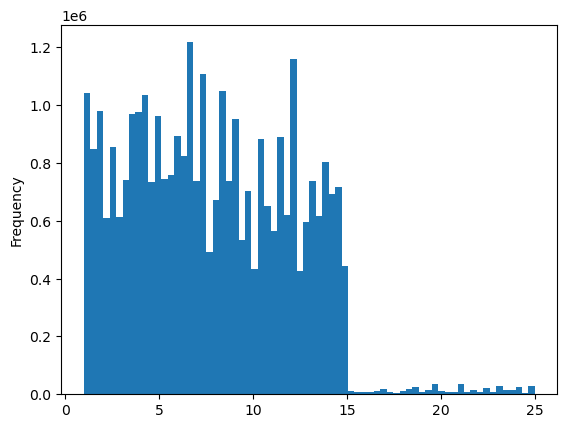

In [17]:
#increase granularity of histogram
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [18]:
#export hist as an image file
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_prices.png'))


In [19]:
#data sampling - split the dataframe into two samples
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [20]:
#assign the two samples
#store 70% of the dataframe in big, store the remaining 30% in small
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [21]:
#check the length of samples against length of full df
len(ords_prods_merge)

32399732

In [22]:
len(big) + len(small)

32399732

In [23]:
#create a subset using only the needed columns from the smaller sample to speed up processing time
df_2 = small[['orders_day_of_week','prices']]

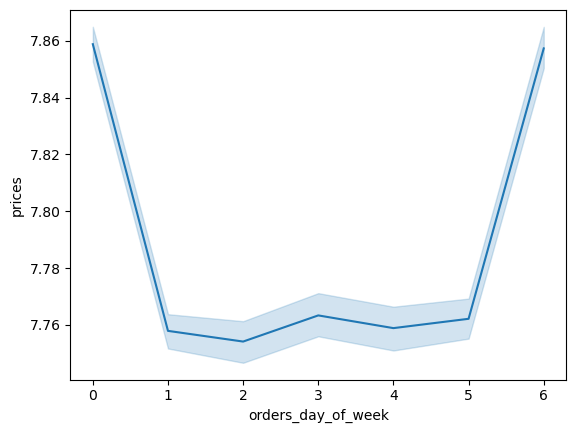

In [24]:
#create line chart using this subset
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [25]:
#the shaded areas around the line represents the confidence intervals - called error bands. 
#in this chart, there is a 95% probability that a predicted value would fall within these areas